In [1]:
# Imports
import matplotlib.pyplot as plt

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
import numpy as np
import DQN.agent as agent
import maze_generator.maze_dataset as md



In [2]:
dataset = md.Maze_dataset(10,(3,3),'dfs')
maze = dataset[0]

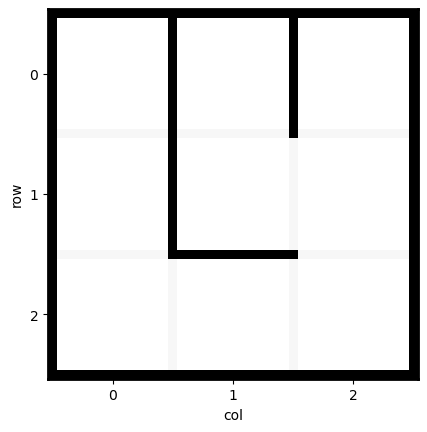

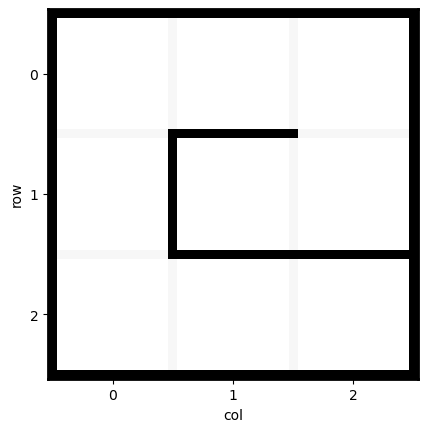

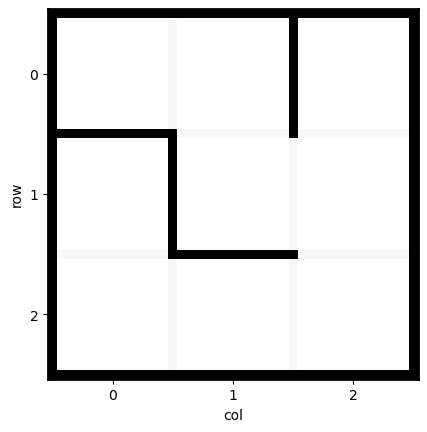

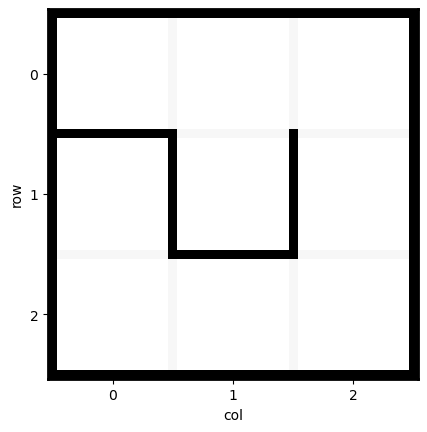

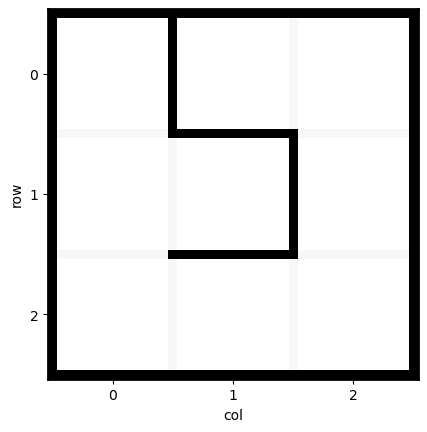

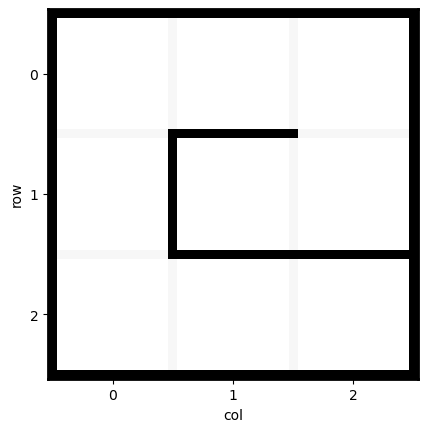

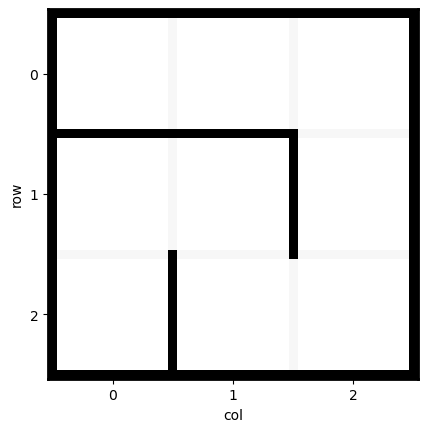

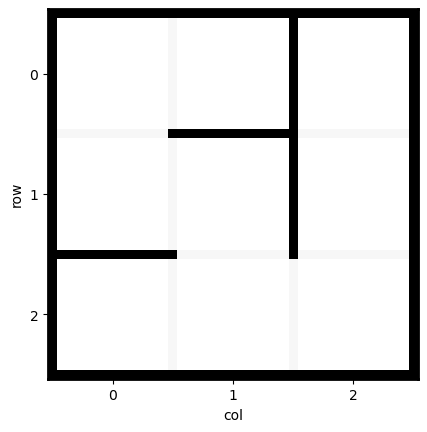

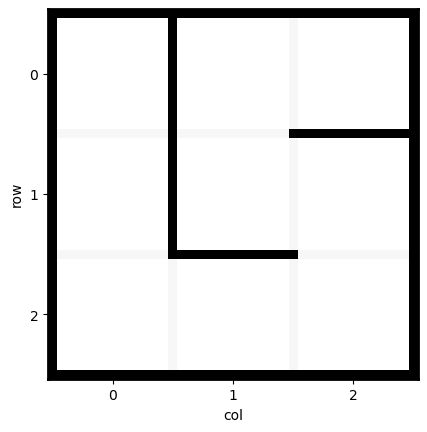

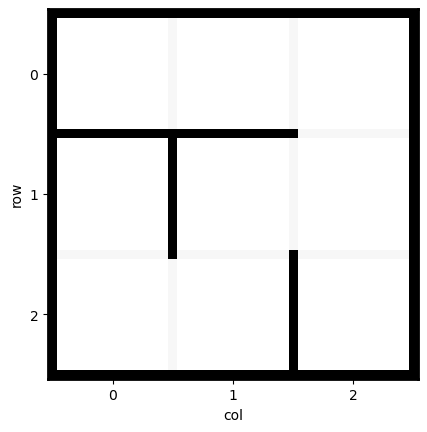

In [3]:
for i in range(len(dataset)):
    dataset.show_maze(i)

In [7]:
mult_agent = agent.CNN_Maze_Agents(3,action_type='cardinal')
mult_agent.run_agent(maze,len_game=20,num_agents=1,epsilon=1,sample_prob=False)

cumulative reward: [7.6]


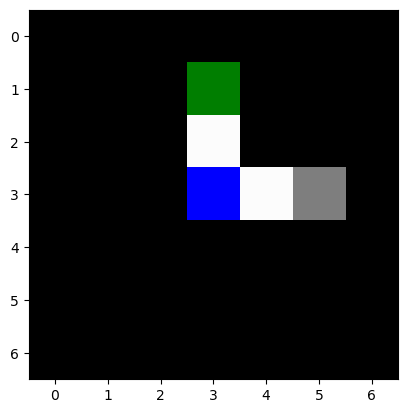

In [5]:
mult_agent.animate_last_replay(0)